# In-class exercises Class 16


---
Today, we will learn about Chi2 distributions...




## Chi2 

Recall from lecture that we can calculate the Chi2 value with the following equation:  

![Image](img/Chi2.png) 

This provides a figure of merit for how well our model descibes our data.  

 





If a random variable *X *has the standard normal distribution, then X² has the the Chi-Squared distribution with one degree of freedom.

X - the normal distribution


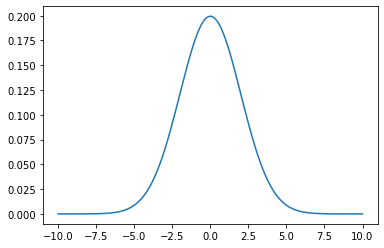

X^2 - shape of the chi-squared distribution


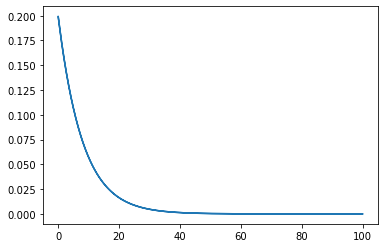

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
xs = np.arange(-10, 10, 0.001)
ys = norm.pdf(xs, 0, 2)

print('X - the normal distribution')
plt.plot(xs, ys)
plt.show()

print('X^2 - shape of the chi-squared distribution')
#plt.ylim(ymax = 1.0, ymin = 0)
#plt.xlim(xmax = 5.0, xmin = 0)
plt.plot([x**2 for x in xs], ys)
plt.show()

If we integrated this distribution above any value it would give us that probability that the Chi^2 is above that value, even if our model was perfect. 

 

Guess what?  scipy.stats provides access to the Chi2 distribution.  Here is one way to plot it for one degree of freedom (if you had one data point). 


Text(0, 0.5, 'Probability density')

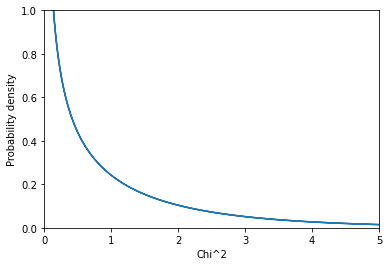

In [17]:
# importing modules 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
xs = np.arange(-5, 5, 0.001)
x2s = [x**2 for x in xs]

#plot Chi-square distribution with 1 degrees of freedom
plt.plot(x2s, chi2.pdf(x2s, df=1))
plt.ylim(ymax = 1.0, ymin = 0)
plt.xlim(xmax = 5.0, xmin = 0)
plt.xlabel("Chi^2")
plt.ylabel("Probability density")

Recall from class:  this means, for example, even if our model was perfect we still have a ~30% chance of getting Chi^2>1 due to statistical fluctuations.  

![Image](img/Chi2_int.png)

We can make it easy to read off these probabilities by plotting them directly with 1-CDF  (one minus the cumulative distribution function).  Think about it...  

Text(0, 0.5, 'Probability')

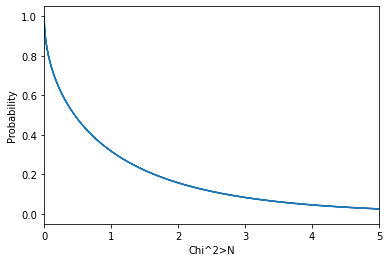

In [18]:
#plot Chi-square distribution with 1 degrees of freedom
plt.plot(x2s, 1-chi2.cdf(x2s, df=1))
plt.xlim(xmax = 5.0, xmin = 0)
plt.xlabel("Chi^2>N")
plt.ylabel("Probability")


From here, you can easily read off that there is about a ~30% chance that Chi^2 will be greater than 1 (1 sigma), and a ~5% chance that Chi^2 will be greater than 4 (2 sigma)


## **EXERCISE 1**:  
<span style="color:red"> Make a zoomed-in version of the plot abot and read off the probability that the Chi^2 is larger than 9 (3 sigma).   </red>



In [ ]:
#put your code to make the plot here

Put your answer to Ex. 1 here. 

We can also explore more degrees of freedom (more data points).  

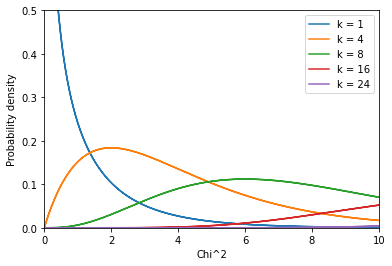

In [23]:
xs = np.arange(-5, 5, 0.001)
x2s = [x**2 for x in xs]

for k in [1, 4, 8, 16, 24]:
    plt.plot(x2s, chi2.pdf(x2s, k), label='k = {0}'.format(k))
    
plt.xlabel("Chi^2")
plt.ylabel("Probability density")
plt.xlim(0, 10)
plt.ylim(0, 0.5)
plt.legend()
plt.show()


## **EXERCISE 2**:  
<span style="color:red"> make the probability density plot for 2 DOF (degrees of freedom).   </red>

In [41]:
#Put your code here

Let's plot the probability for different DOF...

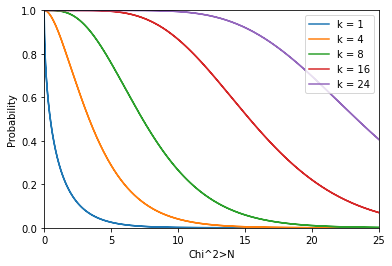

In [29]:
xs = np.arange(-5, 5, 0.001)
x2s = [x**2 for x in xs]

for k in [1, 4, 8, 16, 24]:
    plt.plot(x2s, 1-chi2.cdf(x2s, k), label='k = {0}'.format(k))
plt.xlabel("Chi^2>N")
plt.ylabel("Probability")
plt.xlim(0, 25)
plt.ylim(0, 1)
plt.legend()
plt.show()


## **EXERCISE 3**:  
<span style="color:red"> How likely is Chi^2 value to be above a value of 1 with 2 DOF (even if you have a perfect model to describe your data)?  Hint: what fraction of the curve is above 1? Use 1-CDF.   What ablout for k=8?   </red>

In [41]:
#Put your answer here

As you can see from the figure above, the Chi^2 distribution is very different for differnt degrees of freedom.  So, the probability to get Chi^2 greater than 1 is very different for the distributions as well.  This isn't very convenient if you want to compare the Chi^2 value when different degrees of freedom are involved (we will want to do that later...).  For this reason, we introduce the reduced Chi^2:

![Image](img/Chi2_red.png)


Simply the Chi^2 divided by the number of DOF.  As we saw in class, a good rule of thumb is that a reduced Chi^2<1 means pretty good agreement between the data and the model:  



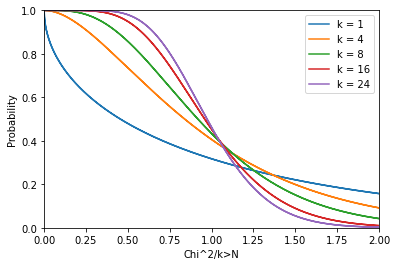

In [31]:
xs = np.arange(-20, 20, 0.001)
x2s = np.array([x**2 for x in xs])



for k in [1, 4, 8, 16, 24]:
   
    plt.plot(x2s/k, 1-chi2.cdf(x2s, k), label='k = {0}'.format(k))
    
plt.xlabel("Chi^2/k>N")
plt.ylabel("Probability")
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.legend()
plt.show()

These are not exactly the same, but as a rule of thumb, Chi^2/k<1 is a pretty good agreement, and Chi^2/k>2 is fairly unlikely.  

## **EXERCISE 3**:  
<span style="color:red"> Make a plot to compare the Chi^2/k>N distribution for 1 DOF and 2 DOF.  How different are the probabilities for a  Chi^2/k>1?     </red>

In [41]:
#Put your answer here